#Part 1: A/B Testing using Ad Click Prediction

In [7]:
#importing all the needed libraries
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from tabulate import tabulate

1.Load the dataset into a pandas DataFrame.

In [8]:
# Load Ad Click Prediction Dataset
ad_df = pd.read_csv('/Users/niyatisiju/Downloads/ad_click_dataset.csv')

print(ad_df)

        id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3       Entertainment     Evening  

2. Perform necessary data cleaning and preprocessing:
Handle missing values
Convert categorical columns  (e.g., gender, ad_position)


In [9]:
# --- Preprocessing ---
# Handle missing values
ad_df=ad_df.dropna()

#convert into catagorical columns
ad_df['gender']=ad_df['gender'].astype('category').cat.codes
ad_df['ad_position']=ad_df['ad_position'].astype('category').cat.codes

print(ad_df)

        id full_name   age  gender device_type  ad_position browsing_history  \
17     188   User188  56.0       0      Tablet            0             News   
25    4890  User4890  43.0       1      Tablet            0        Education   
33    4985  User4985  37.0       1      Mobile            2             News   
52    9888  User9888  49.0       1      Mobile            2             News   
102   8201  User8201  59.0       0     Desktop            0     Social Media   
...    ...       ...   ...     ...         ...          ...              ...   
9951  7268  User7268  28.0       0     Desktop            0             News   
9952  5912  User5912  41.0       2      Mobile            1        Education   
9960  9638  User9638  64.0       2     Desktop            2    Entertainment   
9986  5574  User5574  52.0       0     Desktop            0         Shopping   
9999  3056  User3056  44.0       1      Tablet            2     Social Media   

     time_of_day  click  
17       Morn


3.Split the dataset into two groups:
Group A: Users with ad_position = 0 (Top)
Group B: Users with ad_position = 1  (Bottom)

In [10]:
# Split into two groups
group_A = ad_df[ad_df['ad_position'] == 0]  # Top position
group_B = ad_df[ad_df['ad_position'] == 1]  # Bottom position

print('group A:\n',group_A)
print('group B:\n',group_B)

group A:
         id full_name   age  gender device_type  ad_position browsing_history  \
17     188   User188  56.0       0      Tablet            0             News   
25    4890  User4890  43.0       1      Tablet            0        Education   
102   8201  User8201  59.0       0     Desktop            0     Social Media   
154    118   User118  43.0       0      Tablet            0     Social Media   
170   3062  User3062  34.0       1     Desktop            0    Entertainment   
...    ...       ...   ...     ...         ...          ...              ...   
9866  6989  User6989  28.0       1      Mobile            0         Shopping   
9904  7267  User7267  20.0       1     Desktop            0         Shopping   
9925  5574  User5574  52.0       0     Desktop            0         Shopping   
9951  7268  User7268  28.0       0     Desktop            0             News   
9986  5574  User5574  52.0       0     Desktop            0         Shopping   

     time_of_day  click  
17 

4. Use the statsmodel’s proportions_ztest function to perform an independent two-sample z-test between Group A and Group B.

In [11]:
# Get the total number of click
click_A = group_A['click'].sum()
n_A = len(group_A) #total entries with top position

click_B = group_B['click'].sum()
n_B = len(group_B) #total entries with bottom position

# Perform two-sample z-test
count = np.array([click_A, click_B])
nobs = np.array([n_A, n_B])
z_stat, p_value = proportions_ztest(count, nobs)

5. Print the following:
The z-score
The p-value

In [12]:
#outputs
print(f"Clicks (Top): {click_A} / {n_A}")
print(f"Clicks (Bottom): {click_B} / {n_B}")
print(f"Z-score: {z_stat}")
print(f"P-value: {p_value}")

Clicks (Top): 192 / 283
Clicks (Bottom): 150 / 258
Z-score: 2.3380678956239453
P-value: 0.01938372632068637


6. Interpret the result: Is there a statistically significant difference in click-through rates between the two groups? Justify your answer.

Yes, there is a statistically significant difference in click-through rates between the two groups.

Based on the outputs of the two-sample z-test, we can observe that the p-value is less than the commonly used threshold which is 0.05. This shows that we can reject the null hypothesis, which assumed that there is no difference in the click-through rates between ads placed at the top (Group A) and those placed at the bottom (Group B). In other words, the data provides statistically significant evidence that ad position does influence user behavior. Specifically, users are more likely to click on ads displayed at the top of the page compared to those shown at the bottom. This insight can be valuable for marketing teams and advertisers, as it suggests that prioritizing top-position ad placements could lead to higher engagement and better campaign performance.



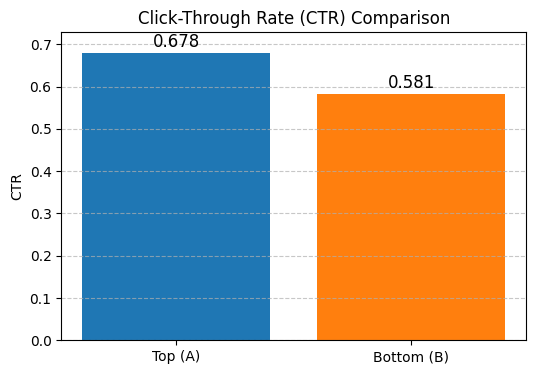

In [13]:
# Plot CTR for Group A and B ---
ctr_a = click_A / n_A
ctr_b = click_B / n_B

plt.figure(figsize=(6, 4))
plt.bar(['Top (A)', 'Bottom (B)'], [ctr_a, ctr_b], color=['#1f77b4', '#ff7f0e'])
plt.title('Click-Through Rate (CTR) Comparison')
plt.ylabel('CTR')
plt.ylim(0, max(ctr_a, ctr_b) + 0.05)
for i, ctr in enumerate([ctr_a, ctr_b]):
    plt.text(i, ctr + 0.005, f"{ctr:.3f}", ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part 2: Covariate Shift Detection Using Air Quality Data

1. You are provided with 3 datasets via this Google Drive link:

train.csv

test1.csv

test2.csv


2. Load all three datasets using pandas.

In [14]:
# Load datasets
test1= pd.read_csv('/Users/niyatisiju/Downloads/test1.csv')
test2= pd.read_csv('/Users/niyatisiju/Downloads/test2.csv')
train_df= pd.read_csv('/Users/niyatisiju/Downloads/train.csv')

print('train:\n', train_df)
print('test1:\n',test1)
print('test2: \n', test2)

train:
       Unnamed: 0        Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0           1849  26/05/2004  19.00.00   -200       1130.0    -200.0     22,7   
1           2533  24/06/2004  07.00.00    1,2       1030.0    -200.0      6,9   
2           3047  15/07/2004  17.00.00    3,2       1164.0    -200.0     20,3   
3            805  13/04/2004  07.00.00    3,9       1496.0     524.0     19,1   
4           2962  12/07/2004  04.00.00   -200        780.0    -200.0      1,8   
...          ...         ...       ...    ...          ...       ...      ...   
3195        3830  17/08/2004  08.00.00    2,5       1155.0    -200.0     16,0   
3196        1897  28/05/2004  19.00.00    1,8       1100.0    -200.0     11,4   
3197        2538  24/06/2004  12.00.00    1,2        959.0    -200.0      5,0   
3198        1146  27/04/2004  12.00.00    2,4       1179.0     255.0     14,6   
3199        3489  03/08/2004  03.00.00   -200        838.0    -200.0      1,7   

      PT08.S2(NMHC)

3. For each test dataset (test1.csv and test2.csv), compare it with train.csv using the Kolmogorov–Smirnov test (scipy.stats.ks_2samp).
Perform the KS test on the NO2(GT) column to identify whether there are any distributional differences.

In [15]:
# Perform KS test on 'NO2(GT)'
ks_stat_1, p_val_1 = ks_2samp(
    train_df['NO2(GT)'][(train_df['NO2(GT)'] >= 0)].dropna(),
    test1['NO2(GT)'][(test1['NO2(GT)'] >= 0)].dropna()
)

ks_stat_2, p_val_2 = ks_2samp(
    train_df['NO2(GT)'][(train_df['NO2(GT)'] >= 0)].dropna(),
    test2['NO2(GT)'][(test2['NO2(GT)'] >= 0)].dropna()
)



4. Report the KS statistic and p-value for each feature.

In [16]:
print("Test1 vs Train:")
print(f"KS Statistic: {ks_stat_1}, P-value: {p_val_1}")

print("\nTest2 vs Train:")
print(f"KS Statistic: {ks_stat_2}, P-value: {p_val_2}")

Test1 vs Train:
KS Statistic: 0.017062220028073977, P-value: 0.9971378232852736

Test2 vs Train:
KS Statistic: 0.3688536442438679, P-value: 2.53172387531317e-74



5. Determine which of the two test datasets (test1.csv or test2.csv) exhibits a covariate shift relative to the training dataset (train.csv). Use the results of the Kolmogorov–Smirnov test to support your answer.

In [17]:
# Determine covariate shift according to Ks test on only NO2(GT)
if p_val_1 < 0.05:
    print("\nConclusion: Test1 shows covariate shift w.r.t training set.")
else:
    print("\nConclusion: Test1 does NOT show significant covariate shift w.r.t training set.")

if p_val_2 < 0.05:
    print("Conclusion: Test2 shows covariate shift w.r.t training set.")
else:
    print("Conclusion: Test2 does NOT show significant covariate shift w.r.t training set.")


Conclusion: Test1 does NOT show significant covariate shift w.r.t training set.
Conclusion: Test2 shows covariate shift w.r.t training set.


The null hypothesis states that the two samples being compared are drawn from the same distribution.

If the p value is less than 0.05 that means we can reject the null hypothesis, which means those samples are not taken form the same distribution. that indicates covariate shift.

To determine which test dataset exhibits a covariate shift relative to the training dataset, we conducted the Kolmogorov–Smirnov (KS) test on the NO2(GT) feature. The results for Test1 vs Train showed a KS Statistic of 0.017 and a p-value of 0.99, which indicates a high similarity between their distributions. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis, suggesting that there is no significant distributional difference between Test1 and the training set for this feature.

on the other hand, the results for Test2 vs Train showed a KS Statistic of 0.36 and an extremely small p-value, which is far less than the significance threshold which is 0.05. This provides strong evidence to reject the null hypothesis, indicating that Test2’s NO2(GT) distribution is significantly different from that of the training data.

Therefore, based on the KS test results, we conclude that Test2 exhibits a covariate shift relative to the training dataset, while Test1 does not.

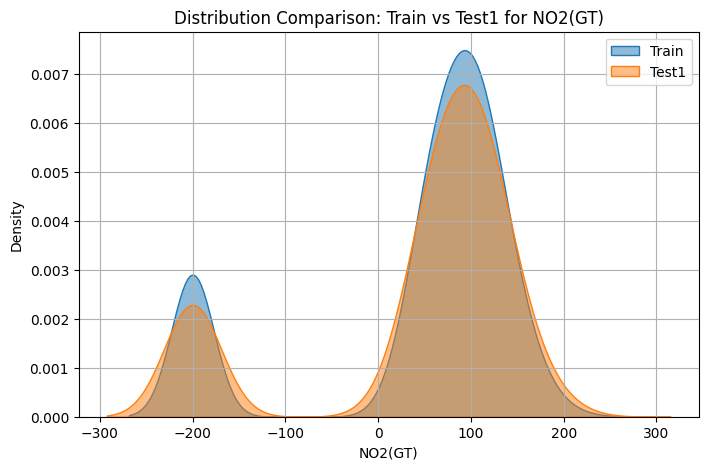

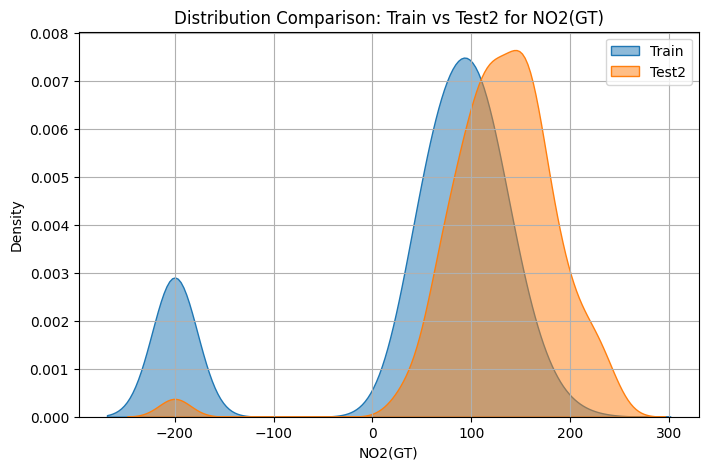

In [18]:
import seaborn as sns

def plot_distribution_comparison(train_col, test_col, feature_name, test_name):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(train_col.dropna(), label='Train', fill=True, alpha=0.5)
    sns.kdeplot(test_col.dropna(), label=test_name, fill=True, alpha=0.5)
    plt.title(f'Distribution Comparison: Train vs {test_name} for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_distribution_comparison(train_df['NO2(GT)'], test1['NO2(GT)'], 'NO2(GT)', 'Test1')
plot_distribution_comparison(train_df['NO2(GT)'], test2['NO2(GT)'], 'NO2(GT)', 'Test2')
